In [4]:
%load_ext autoreload
%autoreload 2
from storytelling import *

In [5]:
yesemite = "/Users/jiayao/Work/Storytelling/src/dat/4499.csv.gz"
df = pd.read_csv(yesemite)
df.shape

(325864, 12)

In [6]:
df.head(2)

,id,text,created_at,retweet_count,user_id,user_followers_count,rt_id,rt_text,rt_created_at,rt_retweet_count,rt_user_id,rt_user_followers_count
0,471653354217934848,The slander for Maya Angelou is mad weak but I...,Wed May 28 14:04:57 +0000 2014,0,141746625,2810,NaN,NaN,NaN,NaN,NaN,NaN
1,471653354494361600,Legendary author Maya Angelou dies http://t.co...,Wed May 28 14:04:57 +0000 2014,0,21773899,205,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df[df["rt_id"].isna()]
print(df.shape)
df.head(2)

(133042, 12)


,id,text,created_at,retweet_count,user_id,user_followers_count,rt_id,rt_text,rt_created_at,rt_retweet_count,rt_user_id,rt_user_followers_count
0,471653354217934848,The slander for Maya Angelou is mad weak but I...,Wed May 28 14:04:57 +0000 2014,0,141746625,2810,NaN,NaN,NaN,NaN,NaN,NaN
1,471653354494361600,Legendary author Maya Angelou dies http://t.co...,Wed May 28 14:04:57 +0000 2014,0,21773899,205,NaN,NaN,NaN,NaN,NaN,NaN


(array([1.0170e+03, 8.2030e+03, 3.7907e+04, 5.6444e+04, 2.0333e+04,
        6.0270e+03, 2.0910e+03, 6.2100e+02, 2.2900e+02, 1.7000e+01]),
 array([0.30103   , 1.07630795, 1.8515859 , 2.62686385, 3.4021418 ,
        4.17741975, 4.9526977 , 5.72797565, 6.5032536 , 7.27853155,
        8.0538095 ]),
 <a list of 10 Patch objects>)

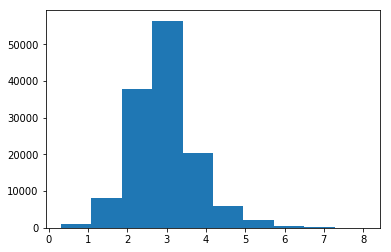

In [8]:
#df[df["user_followers_count"].hist()
df = df[df["user_followers_count"]>1]
follower = np.log10(df["user_followers_count"].values)
plt.hist(follower)

In [9]:
df2 = df[df["user_followers_count"]<10]

In [10]:
for i, row in df2.iterrows():
    print(row["text"])
    print()

"@cthagod: I've used Maya Angelou quotes to gas chicks for years but I'm older now and as she said "You know better you do better" let it 💥

So sad to hear of the passing of Maya Angelou. She was an inspiration to all people. Beautiful words beautiful soul.

"Women should be tough, tender, laugh as much as possible, and live long lives." - Maya Angelou http://t.co/hbTpiRE27E

May flights of angels carry you to peace Maya Angelou.
Gratitude for words that lifted so many should to greater heights!

University: Poet, author Maya Angelou dies at 86 http://t.co/DOZnNCl5VC via @YahooNews

Maya Angelou: A Hymn to Human Endurance http://t.co/YkWdBnqVdP

Goodbye to a Phenomenal Woman...RIP Maya Angelou.

Dr. Maya Angelou 1928-2014 ♥. Today we celebrate the life and legacy of a great visionary! Thank (cont) http://t.co/1osS6BlKID

U.S. author, poet Maya Angelou has died in North Carolina: local media - http://t.co/AA7Z4pvPAD http://t.co/EdFo0IgQQR

R.I.P....
"A great soul serves everyone all the

In [11]:
df1 = df[df["user_followers_count"]>10**5]
df1 = df1.reset_index()
df1.shape

(2798, 13)

In [12]:
df1.head(2)

,index,id,text,created_at,retweet_count,user_id,user_followers_count,rt_id,rt_text,rt_created_at,rt_retweet_count,rt_user_id,rt_user_followers_count
0,149,471653369858113536,R.I.P MAYA ANGELOU ..ANOTHER GREAT GONE ..BUT ...,Wed May 28 14:05:00 +0000 2014,118,26946348,696561,NaN,NaN,NaN,NaN,NaN,NaN
1,330,471653388737081344,WATCH Maya Angelou reading email from Rachel C...,Wed May 28 14:05:05 +0000 2014,4,78706973,115367,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
DC = TwitterCleaner()

In [14]:
Data = []
for i,row in df1.iterrows():
    Data.append(DC.Clean(df1.loc[i, "text"]))
DC.corpusWC(Data, "4884.1gram.wc.txt")

In [15]:
vocabularies = pd.read_csv("4884.1gram.wc.txt", names=["Word", "Count"], delimiter="\t")["Word"].values[:400]
#vocabularies
BW = DC.BagOfWords(Data, vocabularies)
print(BW.shape)

(2798, 400)


(2798, 80)


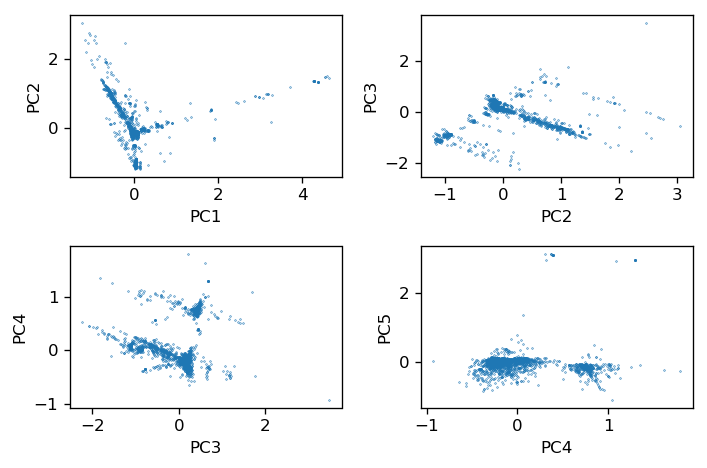

In [16]:
pca = PCA(n_components=80, svd_solver='arpack')
X = pca.fit_transform(BW)
print(X.shape)
fig, axs = plt.subplots(2,2,dpi=120)
for i,(j,k) in enumerate([(0,0),(0,1),(1,0),(1,1)]):
    axs[j,k].scatter(X[:,i], X[:,i+1], s=0.1)
    axs[j,k].set_xlabel("PC%d"%(i+1))
    axs[j,k].set_ylabel("PC%d"%(i+2))
fig.tight_layout()
plt.show()

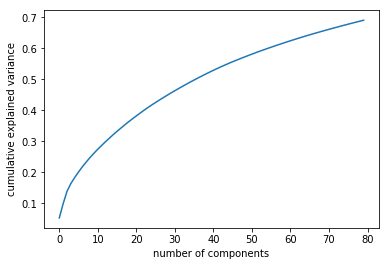

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(X[:, :80])

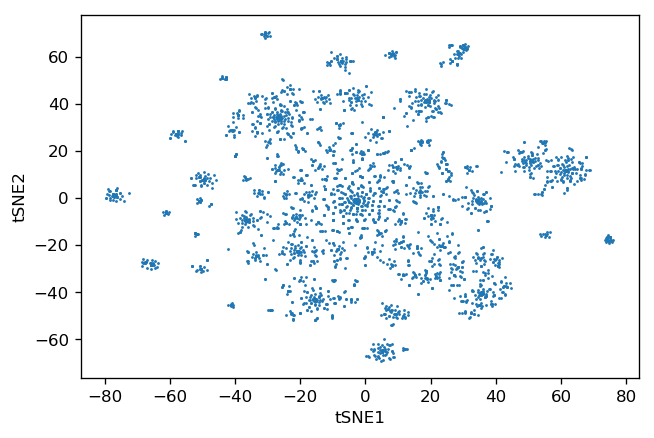

In [19]:
fig = plt.figure(dpi=120)
ax = plt.subplot(111)
ax.scatter(Y[:,0], Y[:,1],s=0.5)
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.show()

In [20]:
Agg = sklearn.cluster.AgglomerativeClustering(n_clusters=40)
clusters = Agg.fit_predict(Y)
groups = AssignCluster(Y, clusters)

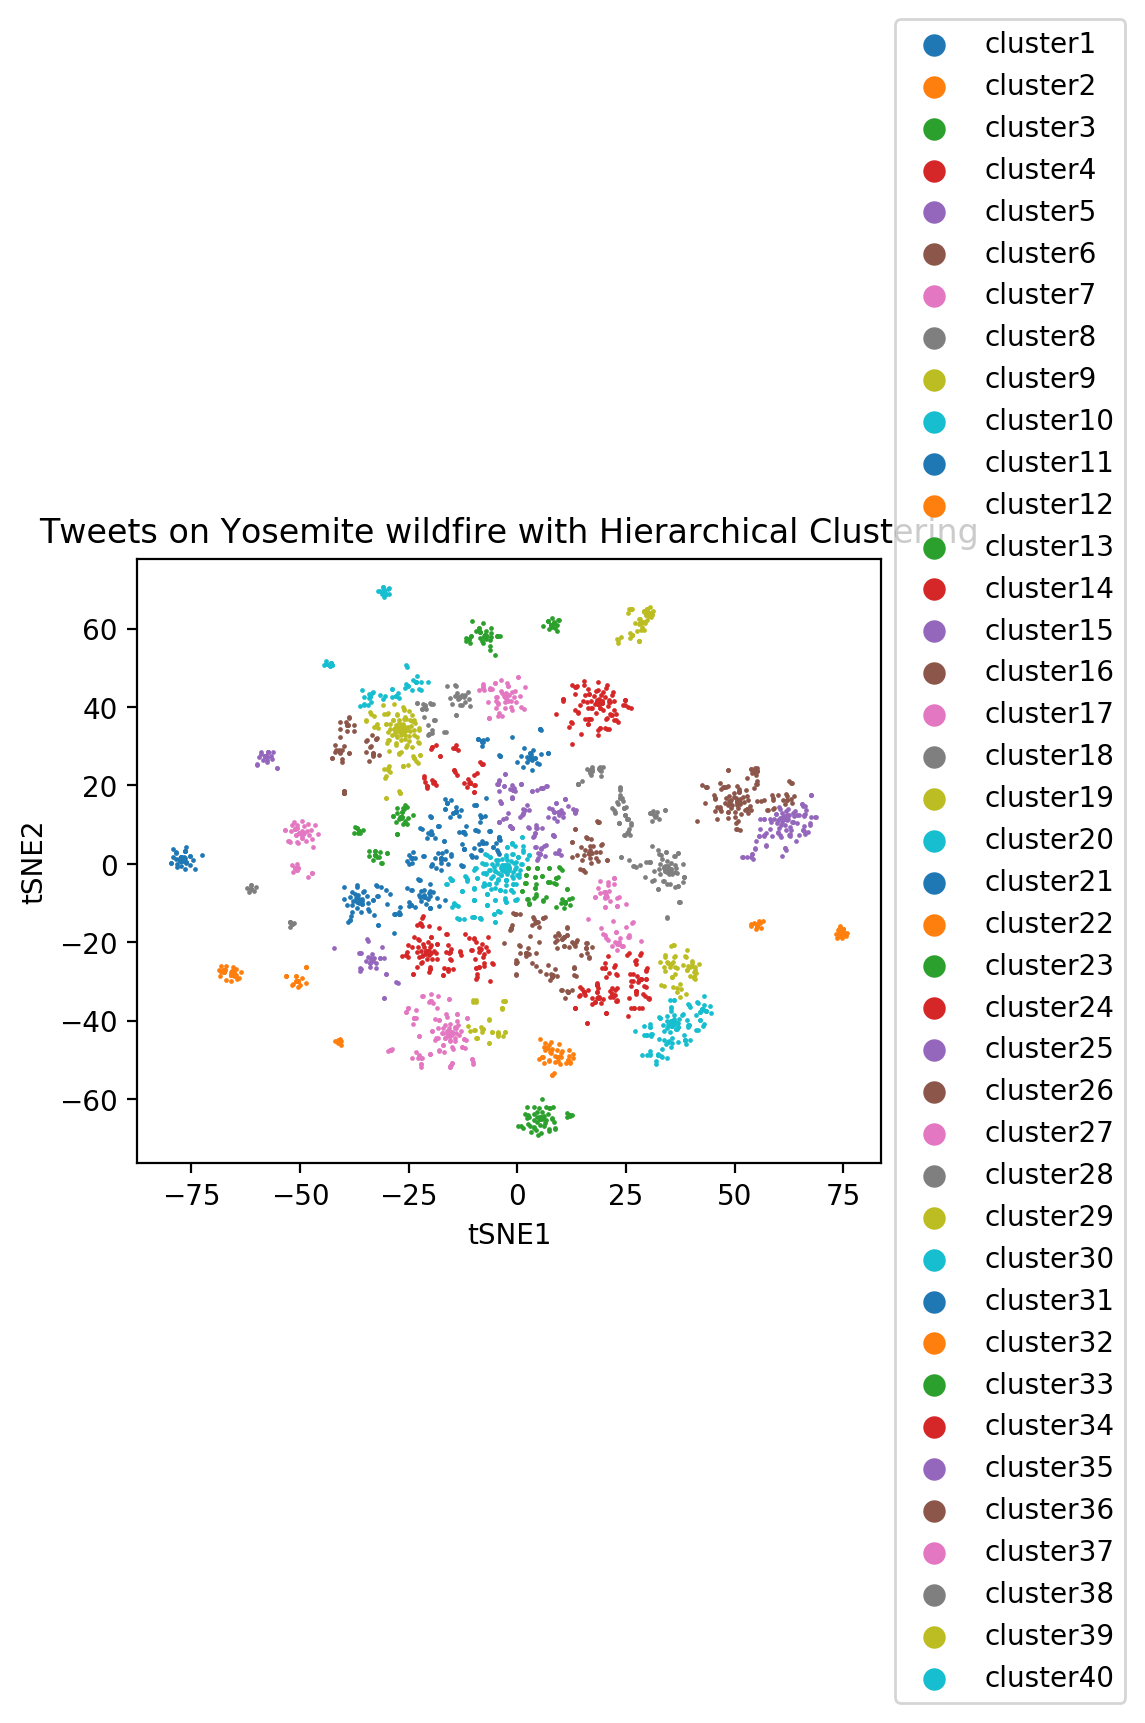

In [21]:
fig = plt.figure(dpi=200)
ax = plt.subplot(111)
for i, group in enumerate(groups):
    group = np.array(group)
    ax.scatter(group[:, 0], group[:, 1], label="cluster%d"%(i+1), s=0.5)
#ax.scatter(centers[:,0], centers[:,1], s=4, color="black", marker="x")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
lgnd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, markerscale=10.)
ax.set_xlabel("tSNE1")
ax.set_ylabel("tSNE2")
plt.title("Tweets on Yosemite wildfire with Hierarchical Clustering")
plt.show()

In [23]:
for i in range(max(clusters)+1):
    print(i+1)
    topics = np.where(clusters==i)
    #print(topics)
    topics = topics[0]
    DC.showTopic(df1, topics, Nshow=3)
    print("-------------")

1
15
Patricia Sheridan's Breakfast With... Maya Angelou from 2005 http://t.co/yARdgcZW6R Wed May 28 14:05:37 +0000 2014
patricia sheridan breakfast maya angelou

38
Flashback: Chicago rapper Common, his foundation honor Maya Angelou in 2011
http://t.co/2rFpwrJeYA Wed May 28 14:07:10 +0000 2014
flashback chicago rapper common foundation honor maya angelou

54
****BREAKING****

Maya Angelou Passes at 86 http://t.co/N2N9jVn0v4 http://t.co/ZBoRspLpSV Wed May 28 14:08:21 +0000 2014
breaking maya angelou passes

62
The Story Behind This Beautiful Photo Of Maya Angelou And Amiri Baraka Dancing http://t.co/QxjoQJ44I9 http://t.co/CnuoFXOfaq Wed May 28 14:08:47 +0000 2014
story behind beautiful photo maya angelou amiri baraka dancing

-------------
2
3
We recall the beautiful farewell words said about Tata Madiba by Maya Angelou: http://t.co/FnywpM0qov. RIP to a soul with many wise words. Wed May 28 14:05:15 +0000 2014
recall beautiful farewell words said tata madiba maya angelou

11
Inspired by